In [2]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
df_original = pd.read_csv("Wimbledon_featured_matches.csv")


df = df_original.loc[df_original["player1"] == "Carlos Alcaraz"]
df = df.loc[df["player2"] == "Novak Djokovic"]
df = df[["match_id","set_no","p1_sets","p2_sets","p1_games","p2_games","p1_score","p2_score"]].drop_duplicates()
df = df.reset_index(drop = True)
df = df.replace("AD",50)
df["p1_score"] = df["p1_score"].astype(int)
df["p2_score"] = df["p2_score"].astype(int)
data1 = df["p1_score"]
data2 = df["p2_score"]

df['Prev_A'] = df['p1_score'].shift(1).fillna(0)
df['Next_A'] = df['p1_score'].shift(-1).fillna(0)


df['Prev_B'] = df['p2_score'].shift(1).fillna(0)
df['Next_B'] = df['p2_score'].shift(-1).fillna(0)

# 定义新列的计算逻辑
def calculate_1(row):
    if row['p1_score'] == 50 and row['Prev_A'] == 40 and row["Next_A"] == 0:
        return 2
    elif row['p1_score'] == 50 and row['Prev_A'] == 40:
        return 1
    elif row['p1_score'] == 40 and row['p2_score'] == 30 and row['Next_A'] == 0.0 and row["Prev_A"] == 30:
        return 2
    elif row['p1_score'] == 40 and row['p2_score'] == 30 and row['Next_A'] == 0.0 and row["Prev_A"] == 40:
        return 1
    elif row['p1_score'] == 50 and row['p2_score'] == 40 and row['Next_A'] == 0.0:
        return 2
    elif row['p1_score'] > row['Prev_A']:
        return 1
    elif row['p1_score'] == row['Prev_A']:
        return 0
    else:
        return 0
    
    
def calculate_2(row):
    if row['p2_score'] == 50 and row['Prev_B'] == 40 and row["Next_B"] == 0:
        return 2
    elif row['p2_score'] == 50 and row['Prev_B'] == 40:
        return 1
    elif row['p2_score'] == 40 and row['p1_score'] == 30 and row['Next_B'] == 0.0 and row['Prev_B'] == 30:
        return 2
    elif row['p2_score'] == 40 and row['p1_score'] == 30 and row['Next_B'] == 0.0 and row['Prev_B'] == 40:
        return 1
    elif row['p2_score'] == 50 and row['p1_score'] == 40 and row['Next_B'] == 0.0:
        return 2
    elif row['p2_score'] > row['Prev_B']:
        return 1
    elif row['p2_score'] == row['Prev_B']:
        return 0
    else:
        return 0
    

# 应用计算逻辑
df['p1'] = df.apply(calculate_1, axis=1)
df['p2'] = df.apply(calculate_2, axis=1)

# 删除辅助列
df.drop(['Prev_A', 'Next_A','Prev_B', 'Next_B'], axis=1, inplace=True)
df.head(50)



p1 = df["p1"].sum() /( df["p1"].sum()+df["p2"].sum())
p2 = df["p2"].sum() /( df["p1"].sum()+df["p2"].sum())



In [4]:

# 创建辅助列
df['prev'] = df['p1'].shift(1).fillna(-1)  # 填充-1以处理第一行没有“前一个”的情况
df['prev_prev'] = df['p1'].shift(2).fillna(-1)

# 定义计算新列值的函数
def calculate_new_value(row):
    if row['prev'] == 0 and row['p1'] == 1:
        return 1
    elif row['prev'] == 1 and row['p1'] == 1:
        return 2 if row['prev_prev'] != 1 else 3
    elif row['prev'] == 0 and row['p1'] == 2:
        return 2
    elif row['prev'] == 1 and row['p1'] == 2:
        return 3
    else:
        return 0  # 对于其他情况，直接返回原始值或者可以根据需要返回特定的值

# 应用函数
df['c1'] = df.apply(calculate_new_value, axis=1)

# 删除辅助列
df.drop(['prev', 'prev_prev'], axis=1, inplace=True)

df.head(50)


,match_id,set_no,p1_sets,p2_sets,p1_games,p2_games,p1_score,p2_score,p1,p2,c1
0,2023-wimbledon-1701,1,0,0,0,0,0,0,0,0,0
1,2023-wimbledon-1701,1,0,0,0,0,0,15,0,1,0
2,2023-wimbledon-1701,1,0,0,0,0,15,15,1,0,1
3,2023-wimbledon-1701,1,0,0,0,0,30,15,1,0,2
4,2023-wimbledon-1701,1,0,0,0,0,30,30,0,1,0
5,2023-wimbledon-1701,1,0,0,0,0,40,30,1,0,1
6,2023-wimbledon-1701,1,0,0,0,0,40,40,0,1,0
7,2023-wimbledon-1701,1,0,0,0,0,40,50,0,2,0
8,2023-wimbledon-1701,1,0,0,0,1,0,0,0,0,0
9,2023-wimbledon-1701,1,0,0,0,1,0,15,0,1,0


In [5]:

# 创建辅助列
df['prev'] = df['p2'].shift(1).fillna(-1)  # 填充-1以处理第一行没有“前一个”的情况
df['prev_prev'] = df['p2'].shift(2).fillna(-1)

# 定义计算新列值的函数
def calculate_new_value(row):
    if row['prev'] == 0 and row['p2'] == 1:
        return 1
    elif row['prev'] == 1 and row['p2'] == 1:
        return 2 if row['prev_prev'] != 1 else 3
    elif row['prev'] == 0 and row['p2'] == 2:
        return 2
    elif row['prev'] == 1 and row['p2'] == 2:
        return 3
    else:
        return 0  # 对于其他情况，直接返回原始值或者可以根据需要返回特定的值

# 应用函数
df['c2'] = df.apply(calculate_new_value, axis=1)

# 删除辅助列
df.drop(['prev', 'prev_prev'], axis=1, inplace=True)

df.head(50)




,match_id,set_no,p1_sets,p2_sets,p1_games,p2_games,p1_score,p2_score,p1,p2,c1,c2
0,2023-wimbledon-1701,1,0,0,0,0,0,0,0,0,0,0
1,2023-wimbledon-1701,1,0,0,0,0,0,15,0,1,0,1
2,2023-wimbledon-1701,1,0,0,0,0,15,15,1,0,1,0
3,2023-wimbledon-1701,1,0,0,0,0,30,15,1,0,2,0
4,2023-wimbledon-1701,1,0,0,0,0,30,30,0,1,0,1
5,2023-wimbledon-1701,1,0,0,0,0,40,30,1,0,1,0
6,2023-wimbledon-1701,1,0,0,0,0,40,40,0,1,0,1
7,2023-wimbledon-1701,1,0,0,0,0,40,50,0,2,0,3
8,2023-wimbledon-1701,1,0,0,0,1,0,0,0,0,0,0
9,2023-wimbledon-1701,1,0,0,0,1,0,15,0,1,0,1


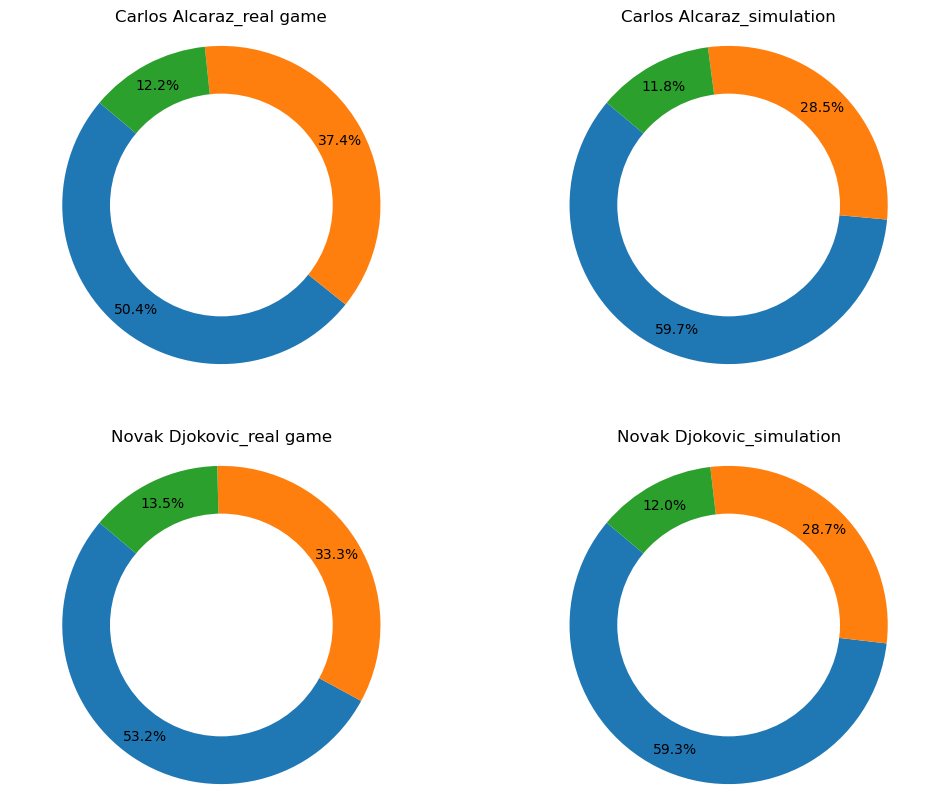

In [6]:
single1 = (df['c1'] == 1).sum()
three1 = (df['c1'] == 3).sum()
two1 = df["p1"].sum() - single1 - three1

single2 =  (df['c2'] == 1).sum()
three2 =  (df['c2'] == 3).sum()
two2 = df["p2"].sum() - single2 - three2


a1 = [0,0,0]
b1 = [0,0,0]

def simulate_match(p1, p2, a1, b1):
    score1, score2 = 0, 0  # 分数初始化
    rounds_won1, rounds_won2 = 0, 0  # 赢得的局数
    a = 0
    b = 0
    while True:
        # 模拟每一局的胜负
        if np.random.rand() < p1 :
            rounds_won1 += 1
            a += 1
            b = 0
            if a == 1:
                a1[0] += 1
            elif a == 2:
                a1[1] += 1
            elif a >= 3:
                a1[2] += 1

        else:
            b += 1
            a = 0
            if b == 1:
                b1[0] += 1
            elif b == 2:
                b1[1] += 1
            elif b >= 3:
                b1[2] += 1
            rounds_won2 += 1
        
        # 更新分数
        if rounds_won1 == 1:
            score1 = 15
        elif rounds_won1 == 2:
            score1 = 30
        elif rounds_won1 >= 3:
            score1 = 40
        
        if rounds_won2 == 1:
            score2 = 15
        elif rounds_won2 == 2:
            score2 = 30
        elif rounds_won2 >= 3:
            score2 = 40
        
        # 检查比赛是否结束
        if score1 == 40 and score2 < 30:
            
            break
        elif score2 == 40 and score1 < 30:
            
            break
        elif score1 == 40  and rounds_won1 > rounds_won2 + 1:
            
            break
        elif score2 == 40  and rounds_won2 > rounds_won1 + 1:
            
            break
    
    return a1, b1



for i in range(100000):
    a1, b1 = simulate_match(p1, p2, a1, b1)

fig, axs = plt.subplots(2, 2, figsize=(12, 10))
sizes = [single1, two1, three1]
axs[0,0].pie(sizes, labels=None, autopct='%1.1f%%', startangle=140,
               pctdistance=0.85, labeldistance=1.1)  # pctdistance 控制百分比标签的位置，labeldistance 控制标签的位置
    
centre_circle = plt.Circle((0, 0), 0.70, fc='white')

axs[0,0].add_artist(centre_circle)
# 画一个中心的白色圆圈，使饼状图看起来像环状图


axs[0,0].axis('equal')  # 保证饼状图是圆形
axs[0,0].set_title("Carlos Alcaraz_real game")  # 添加图形名称
sizes = [single2, two2, three2]
axs[1,0].pie(sizes, labels=None, autopct='%1.1f%%', startangle=140,
               pctdistance=0.85, labeldistance=1.1)  # pctdistance 控制百分比标签的位置，labeldistance 控制标签的位置
    
centre_circle = plt.Circle((0, 0), 0.70, fc='white')

axs[1,0].add_artist(centre_circle)
# 画一个中心的白色圆圈，使饼状图看起来像环状图


axs[1,0].axis('equal')  # 保证饼状图是圆形
axs[1,0].set_title("Novak Djokovic_real game")  # 添加图形名称

axs[0,1].pie(a1, labels=None, autopct='%1.1f%%', startangle=140,
               pctdistance=0.85, labeldistance=1.1)  # pctdistance 控制百分比标签的位置，labeldistance 控制标签的位置
    
centre_circle = plt.Circle((0, 0), 0.70, fc='white')

axs[0,1].add_artist(centre_circle)
# 画一个中心的白色圆圈，使饼状图看起来像环状图


axs[0,1].axis('equal')  # 保证饼状图是圆形
axs[0,1].set_title("Carlos Alcaraz_simulation")  # 添加图形名称


axs[1,1].pie(b1, labels=None, autopct='%1.1f%%', startangle=140,
               pctdistance=0.85, labeldistance=1.1)  # pctdistance 控制百分比标签的位置，labeldistance 控制标签的位置
    
centre_circle = plt.Circle((0, 0), 0.70, fc='white')

axs[1,1].add_artist(centre_circle)
# 画一个中心的白色圆圈，使饼状图看起来像环状图


axs[1,1].axis('equal')  # 保证饼状图是圆形
axs[1,1].set_title("Novak Djokovic_simulation")  # 添加图形名称
plt.show()